<a href="https://colab.research.google.com/github/samuelbahia/Report/blob/master/Avalia%C3%A7%C3%A3o_Final_Arquitetura_de_Big_Data_Samuel_Bahia_IBMEC_MBA_BI_DS_IBM1818_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desenvolva um código utilizando a linguagem de programação Python e a
biblioteca Polars para implementar paralelismo e clusterização. Você irá baixar, processar e analisar dados do novo Bolsa Família.

Instruções:

Instruções:

1. Estrutura de Diretórios:

Crie uma estrutura de diretórios adequada em Big Data para
armazenar os dados e resultados da análise.

2. Download dos Dados:

Baixe os arquivos dos datasets referentes aos meses de fevereiro e
março de 2024 nos seguintes links:

 Dataset Fevereiro 2024
 Dataset Março 2024

3. Descompactação e Concatenação:

Descompacte os arquivos baixados e concatene os dados em um
único DataFrame.

4. Conversão para Pandas:
Converta o DataFrame do Polars para um DataFrame do Pandas
para facilitar a visualização e análise.

5. Geração de Gráficos:
Utilize a biblioteca Matplotlib para gerar gráficos que visualizem os
dados. Inclua pelo menos dois gráficos:

Exemplos de gráficos
 Um gráfico de barras para mostrar a distribuição de uma
variável categórica.
 Um gráfico de linhas para observar tendências ao longo do
tempo.

6. Análise Exploratória:

Realize uma análise exploratória dos dados, incluindo:

 Resumo estatístico das principais variáveis.
 Identificação de valores nulos e tratamento.
 Insights sobre a distribuição dos dados.

7. Relatório de Análise:

Escreva um pequeno parágrafo resumindo suas análises,
destacando os principais achados e observações relevantes.

total 12
drwxr-xr-x 3 root root 4096 Oct 28 22:57 BigData
drwxr-xr-x 4 root root 4096 Oct 29 00:06 dados
drwxr-xr-x 1 root root 4096 Oct 25 13:16 sample_data
--2024-10-29 00:09:38--  https://dadosabertos-download.cgu.gov.br/PortalDaTransparencia/saida/novo-bolsa-familia/202402_NovoBolsaFamilia.zip
Resolving dadosabertos-download.cgu.gov.br (dadosabertos-download.cgu.gov.br)... 3.162.163.87, 3.162.163.94, 3.162.163.83, ...
Connecting to dadosabertos-download.cgu.gov.br (dadosabertos-download.cgu.gov.br)|3.162.163.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 371594798 (354M) [application/x-zip-compressed]
Saving to: ‘dados/raw/zip/202402_NovoBolsaFamilia.zip.1’

202402_NovoBolsaFam 100%[===================>] 354.38M   272MB/s    in 1.3s    

2024-10-29 00:09:40 (272 MB/s) - ‘dados/raw/zip/202402_NovoBolsaFamilia.zip.1’ saved [371594798/371594798]

--2024-10-29 00:09:40--  https://dadosabertos-download.cgu.gov.br/PortalDaTransparencia/saida/novo-bolsa-famil

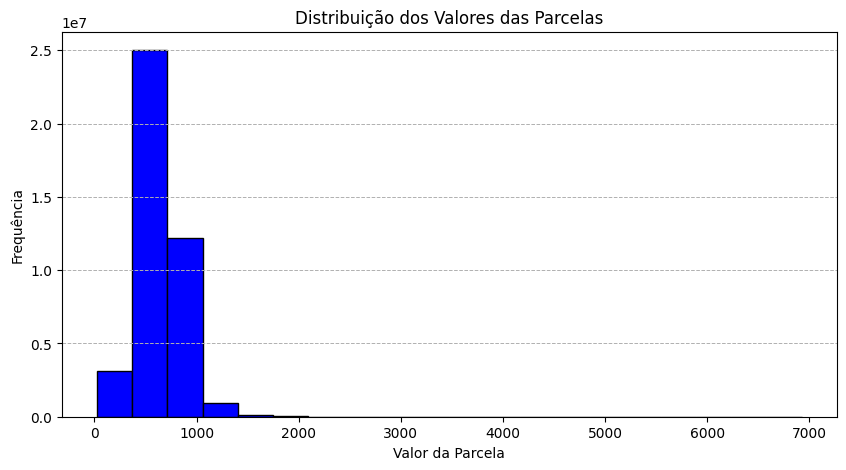

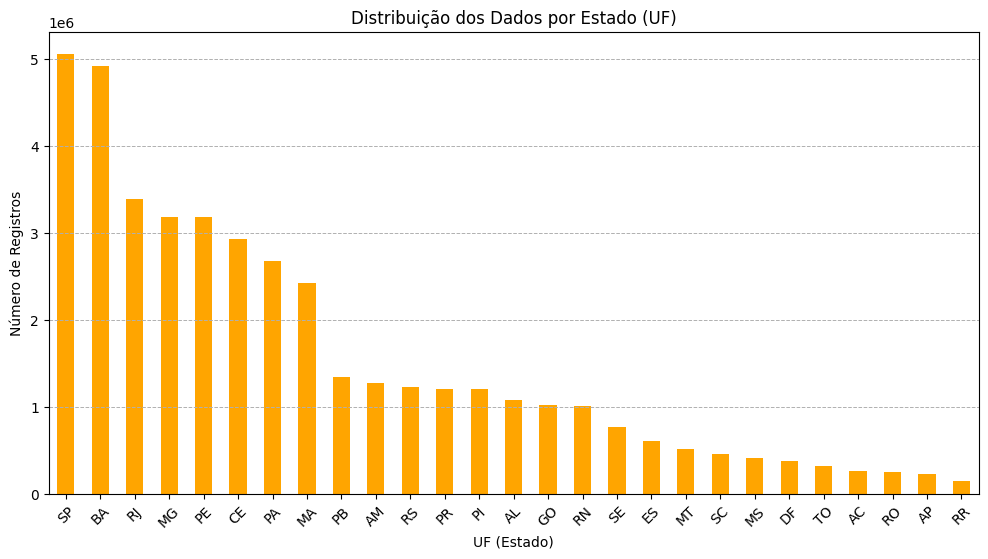

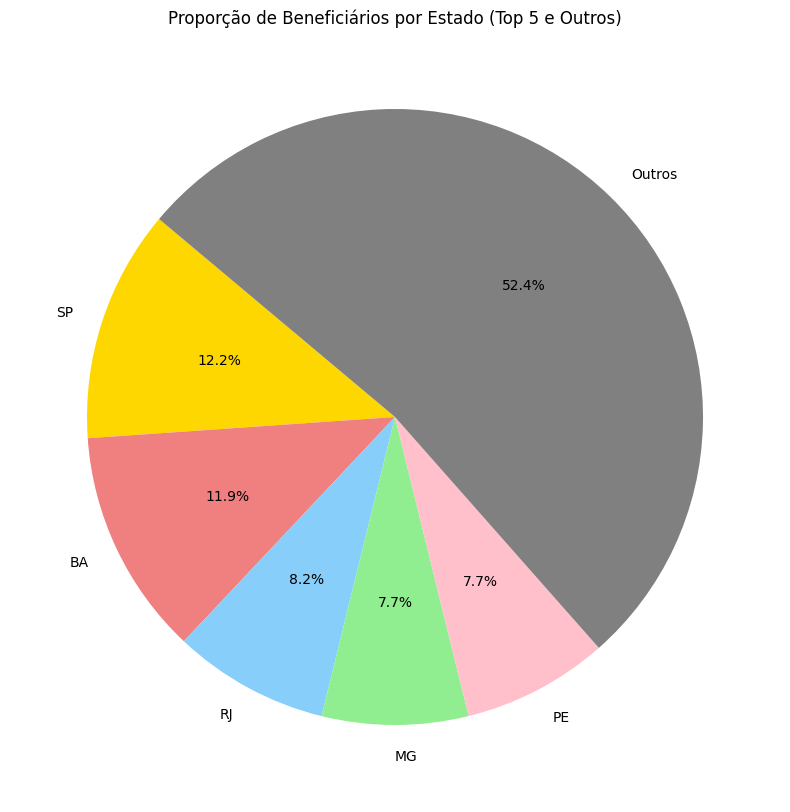

In [14]:
!pip install polars

'''CRIAR A ESTRUTURA DE DIRETÓRIOS PARA ARMAZENAR OS DADOS'''
!mkdir -p dados
!mkdir -p dados/raw
!mkdir -p dados/raw/csv
!mkdir -p dados/raw/zip
!mkdir -p dados/bronze

!ls -l

'''COLETA DE DADOS'''
!wget -P dados/raw/zip/ https://dadosabertos-download.cgu.gov.br/PortalDaTransparencia/saida/novo-bolsa-familia/202402_NovoBolsaFamilia.zip
!wget -P dados/raw/zip/ https://dadosabertos-download.cgu.gov.br/PortalDaTransparencia/saida/novo-bolsa-familia/202403_NovoBolsaFamilia.zip

'''DESCOMPACTAR OS DADOS'''
!unzip dados/raw/zip/202402_NovoBolsaFamilia.zip -d dados/raw/csv
!unzip dados/raw/zip/202403_NovoBolsaFamilia.zip -d dados/raw/csv

# Importar bibliotecas necessárias
import polars as pl  # Polars para manipulação de dados
import matplotlib.pyplot as plt  # Matplotlib para criação dos gráficos
from datetime import datetime

# Constante
ENDERECO_RAW = r'./dados/raw/'

# Tratamento de erros
try:
    # Obter a hora inicial
    hora_inicial = datetime.now()
    print('Hora inicial:', hora_inicial)

    # Iniciando o tratamento dos dados
    print('Iniciando tratamento de dados...')

    # Lista dos arquivos que precisam ser processados
    arquivos = [
        # '202401_NovoBolsaFamilia.csv',  # Removed this file as it was not downloaded
        '202402_NovoBolsaFamilia.csv',
        '202403_NovoBolsaFamilia.csv'
    ]

    # Inicializar uma variável para armazenar todos os dados concatenados
    df_bf = None
    for arquivo_bf in arquivos:
        # Ler cada arquivo CSV usando Polars, com separador ";" e codificação "iso-8859-1"
        caminho_csv = ENDERECO_RAW + 'csv/' + arquivo_bf
        df = pl.read_csv(caminho_csv, separator=';', encoding='iso-8859-1')

        # Concatenar os DataFrames para juntar todos os dados em um só lugar
        if df_bf is not None:
            df_bf = pl.concat([df_bf, df])
        else:
            df_bf = df

    # Mostrar as 10 primeiras linhas dos dados para conferir a leitura
    print(df_bf.head(10))

    # Converter o DataFrame do Polars para Pandas para gerar gráficos
    df_pandas = df_bf.to_pandas()

    # GRÁFICO 1: Histograma dos valores de parcela
    plt.figure(figsize=(10, 5))  # Define o tamanho do gráfico
    plt.hist(
        df_pandas['VALOR PARCELA'].str.replace(',', '.').astype(float),  # Converte os valores para float
        bins=20,  # Define o número de intervalos (bins) para o histograma
        color='blue',  # Cor das barras do histograma
        edgecolor='black'  # Cor das bordas das barras do histograma
    )
    plt.xlabel('Valor da Parcela')  # Nomeia o eixo X
    plt.ylabel('Frequência')  # Nomeia o eixo Y
    plt.title('Distribuição dos Valores das Parcelas')  # Define o título do gráfico
    plt.grid(axis='y', linestyle='--', linewidth=0.7)  # Adiciona uma grade no eixo Y
    plt.show()  # Exibe o gráfico

    # GRÁFICO 2: Gráfico de barras da distribuição por UF (Estado)
    plt.figure(figsize=(12, 6))  # Define o tamanho do gráfico
    df_pandas['UF'].value_counts().plot(
        kind='bar',  # Define o tipo do gráfico como barras
        color='orange'  # Define a cor das barras
    )
    plt.xlabel('UF (Estado)')  # Nomeia o eixo X
    plt.ylabel('Número de Registros')  # Nomeia o eixo Y
    plt.title('Distribuição dos Dados por Estado (UF)')  # Define o título do gráfico
    plt.grid(axis='y', linestyle='--', linewidth=0.7)  # Adiciona uma grade no eixo Y para facilitar a leitura
    plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
    plt.show()  # Exibe o gráfico

    # GRÁFICO 3: Gráfico de pizza para proporção de beneficiários por estado
    plt.figure(figsize=(10, 10))  # Define o tamanho do gráfico
    # Pega os 5 estados com mais registros para facilitar a visualização, e agrupa os demais como "Outros"
    top_ufs = df_pandas['UF'].value_counts().nlargest(5)
    other_count = df_pandas['UF'].value_counts().iloc[5:].sum()
    labels = list(top_ufs.index) + ['Outros']
    sizes = list(top_ufs.values) + [other_count]

    plt.pie(
        sizes,  # Tamanhos de cada fatia
        labels=labels,  # Rótulos das fatias
        autopct='%1.1f%%',  # Mostra o percentual em cada fatia
        colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'grey'],  # Cores das fatias
        startangle=140  # Ângulo inicial
    )

    plt.title('Proporção de Beneficiários por Estado (Top 5 e Outros)')  # Define o título do gráfico

    plt.show()  # Exibe o gráfico

except Exception as e:
    print('Erro ao coletar dados:', e)

    # Initialize df_pandas to an empty DataFrame if an error occurs
    import pandas as pd
    df_pandas = pd.DataFrame() # This ensures df_pandas is defined


    # GRÁFICO 4: Total do valor da parcela por UF e mês de referência (gráfico de linha)
    df_pandas['VALOR PARCELA'] = df_pandas['VALOR PARCELA'].str.replace(',', '.').astype(float)
    df_pandas['MÊS COMPETÊNCIA'] = df_pandas['MÊS COMPETÊNCIA'].astype(str)
    df_grafico_linha = df_pandas.groupby(['UF', 'MÊS COMPETÊNCIA'])['VALOR PARCELA'].sum().reset_index()

    plt.figure(figsize=(15, 8))
    for uf in df_grafico_linha['UF'].unique():
      df_uf = df_grafico_linha[df_grafico_linha['UF'] == uf]
      plt.plot(df_uf['MÊS COMPETÊNCIA'], df_uf['VALOR PARCELA'], label=uf)

    plt.xlabel('Mês Competência')
    plt.ylabel('Total do Valor da Parcela')
    plt.title('Total do Valor da Parcela por UF e Mês Compeência')
    plt.legend()
    plt.grid(True)
    plt.show()


Resumo Estatístico com as principais variáveis

Resumo Estatístico das Variáveis Numéricas:
       MÊS COMPETÊNCIA  MÊS REFERÊNCIA  CÓDIGO MUNICÍPIO SIAFI  NIS FAVORECIDO
count     4.142447e+07    4.142447e+07            4.142447e+07    4.142370e+07
mean      2.024025e+05    2.024021e+05            3.873741e+03    1.726562e+10
std       4.999720e-01    6.311748e+00            2.803150e+03    3.245017e+09
min       2.024020e+05    2.023030e+05            1.000000e+00    1.000041e+10
25%       2.024020e+05    2.024020e+05            1.389000e+03    1.603773e+10
50%       2.024020e+05    2.024020e+05            3.403000e+03    1.645402e+10
75%       2.024030e+05    2.024030e+05            6.001000e+03    2.040172e+10
max       2.024030e+05    2.024030e+05            9.997000e+03    2.389491e+10

Resumo Estatístico das Variáveis Categóricas:

Coluna: UF
- Número de valores únicos: 27
- Moda: ['SP']

Coluna: NOME MUNICÍPIO
- Número de valores únicos: 5291
- Moda: ['SAO PAULO']

Coluna: CPF FAVORECIDO
- Número de valores únicos: 999162
- 

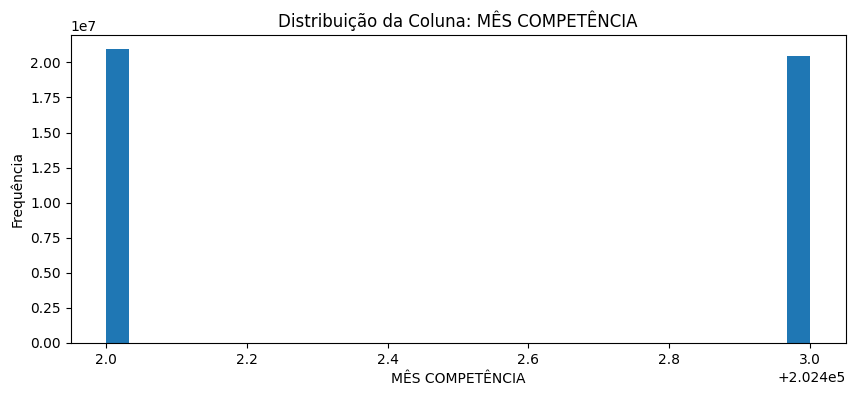

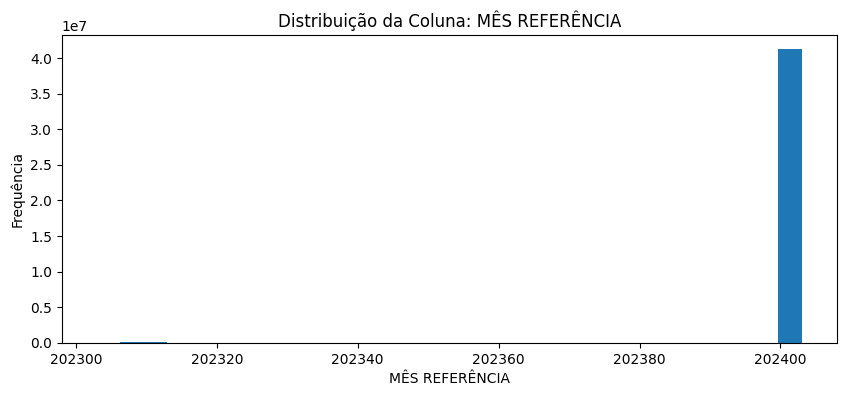

Distribuição da Coluna: UF
UF
SP    5058292
BA    4920984
RJ    3391960
MG    3179043
PE    3177070
CE    2930932
PA    2673236
MA    2419345
PB    1339297
AM    1275960
Name: count, dtype: int64



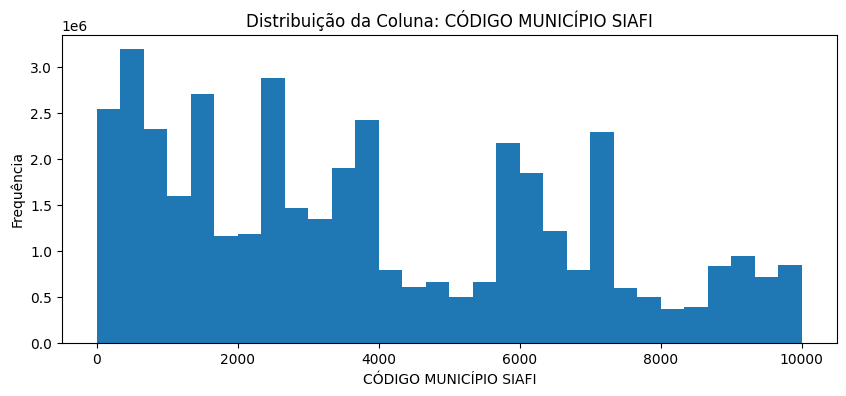

Distribuição da Coluna: NOME MUNICÍPIO
NOME MUNICÍPIO
SAO PAULO         1378018
RIO DE JANEIRO    1128266
FORTALEZA          680691
SALVADOR           590725
MANAUS             530880
BELEM              377753
BRASILIA           375720
RECIFE             289697
BELO HORIZONTE     270091
NOVA IGUACU        256681
Name: count, dtype: int64

Distribuição da Coluna: CPF FAVORECIDO
CPF FAVORECIDO
                  7103804
***.222.103-**        115
***.088.303-**        112
***.596.503-**        108
***.784.804-**        105
***.776.003-**        103
***.401.603-**        102
***.540.603-**        102
***.563.703-**        102
***.423.803-**        102
Name: count, dtype: int64



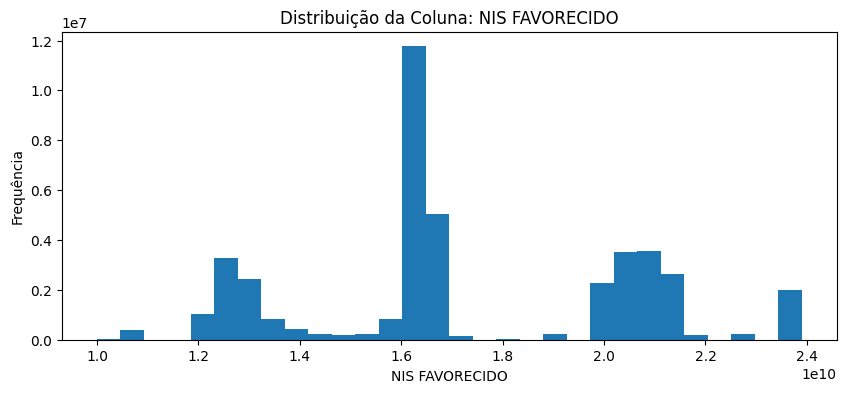

Distribuição da Coluna: NOME FAVORECIDO
NOME FAVORECIDO
MARIA JOSE DA SILVA           26283
MARIA APARECIDA DA SILVA      19554
MARIA JOSE DOS SANTOS         10093
MARIA DE FATIMA DA SILVA       9939
ANA PAULA DA SILVA             9532
MARIA APARECIDA DOS SANTOS     8867
MARIA DE LOURDES DA SILVA      6556
MARIA DO SOCORRO DA SILVA      5647
ANA MARIA DA SILVA             4974
ANA PAULA DOS SANTOS           4862
Name: count, dtype: int64

Distribuição da Coluna: VALOR PARCELA
VALOR PARCELA
600,00    11170271
650,00     5650404
750,00     5028785
800,00     2727053
700,00     2209937
440,00     1013341
900,00     1005213
300,00      963150
325,00      926296
850,00      845547
Name: count, dtype: int64



In [15]:
# Resumo estatístico das principais variáveis numéricas
print("Resumo Estatístico das Variáveis Numéricas:")
print(df_pandas.describe())

# Resumo estatístico das variáveis categóricas
print("\nResumo Estatístico das Variáveis Categóricas:")
for column in df_pandas.select_dtypes(include='object').columns:
    print(f"\nColuna: {column}")
    print(f"- Número de valores únicos: {df_pandas[column].nunique()}")
    print(f"- Moda: {df_pandas[column].mode().values}")

# Tratamento de valores nulos
print("\nTratamento de Valores Nulos:")
print(df_pandas.isnull().sum())

# Insights sobre a distribuição dos dados
print("\nDistribuição dos Dados:")
for column in df_pandas.columns:
    if df_pandas[column].dtype in ['float64', 'int64']:
        plt.figure(figsize=(10, 4))
        df_pandas[column].hist(bins=30)
        plt.title(f'Distribuição da Coluna: {column}')
        plt.xlabel(column)
        plt.ylabel('Frequência')
        plt.grid(False)
        plt.show()
    else:
        print(f"Distribuição da Coluna: {column}")
        print(df_pandas[column].value_counts().head(10))
        print()

Identificação de valores nulos e tratamento.

Identificação de Valores Nulos:
MÊS COMPETÊNCIA             0
MÊS REFERÊNCIA              0
UF                          0
CÓDIGO MUNICÍPIO SIAFI      0
NOME MUNICÍPIO              0
CPF FAVORECIDO              0
NIS FAVORECIDO            778
NOME FAVORECIDO             0
VALOR PARCELA               0
dtype: int64


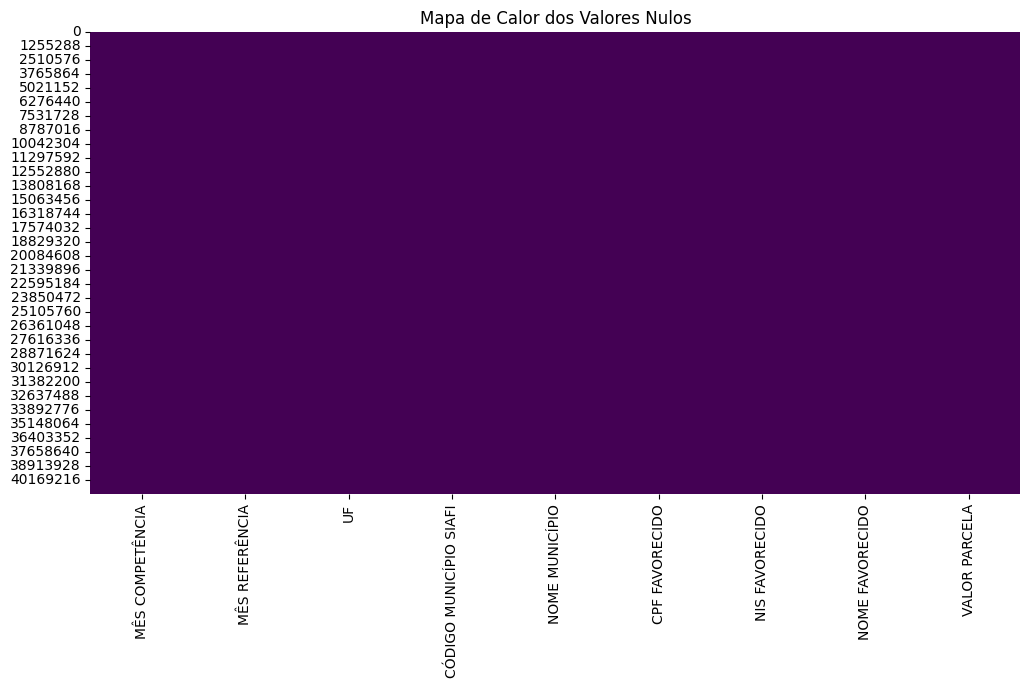

In [16]:
# Identificar valores nulos
print("Identificação de Valores Nulos:")
print(df_pandas.isnull().sum())

# Opcional: Visualização dos valores nulos
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df_pandas.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor dos Valores Nulos')
plt.show()

 Insights sobre a distribuição dos dados.

Estatísticas Descritivas para Colunas Numéricas:
       MÊS COMPETÊNCIA  MÊS REFERÊNCIA  CÓDIGO MUNICÍPIO SIAFI  NIS FAVORECIDO
count     4.142447e+07    4.142447e+07            4.142447e+07    4.142370e+07
mean      2.024025e+05    2.024021e+05            3.873741e+03    1.726562e+10
std       4.999720e-01    6.311748e+00            2.803150e+03    3.245017e+09
min       2.024020e+05    2.023030e+05            1.000000e+00    1.000041e+10
25%       2.024020e+05    2.024020e+05            1.389000e+03    1.603773e+10
50%       2.024020e+05    2.024020e+05            3.403000e+03    1.645402e+10
75%       2.024030e+05    2.024030e+05            6.001000e+03    2.040172e+10
max       2.024030e+05    2.024030e+05            9.997000e+03    2.389491e+10


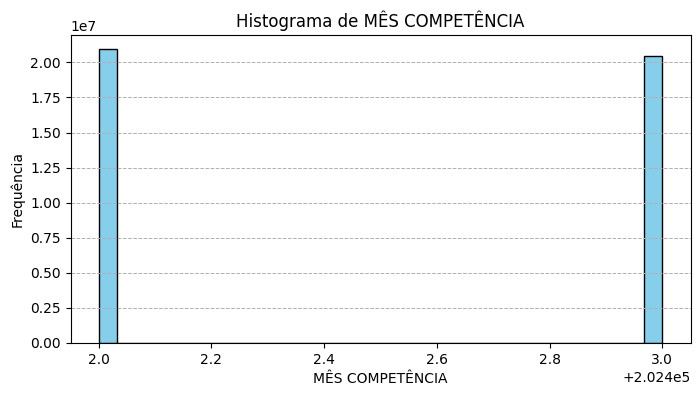

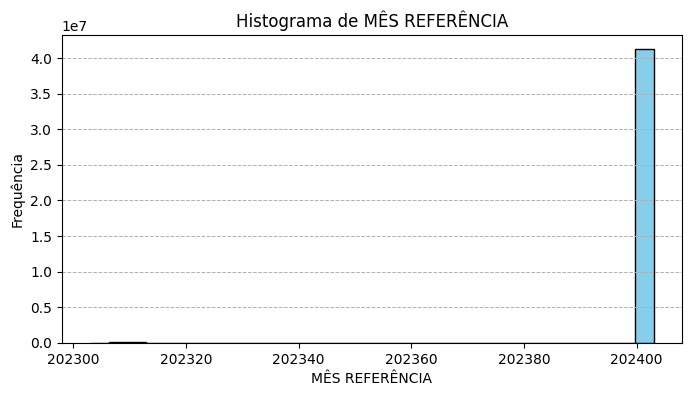

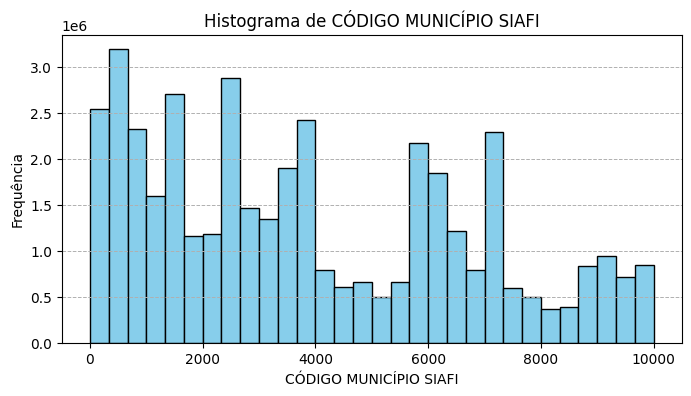

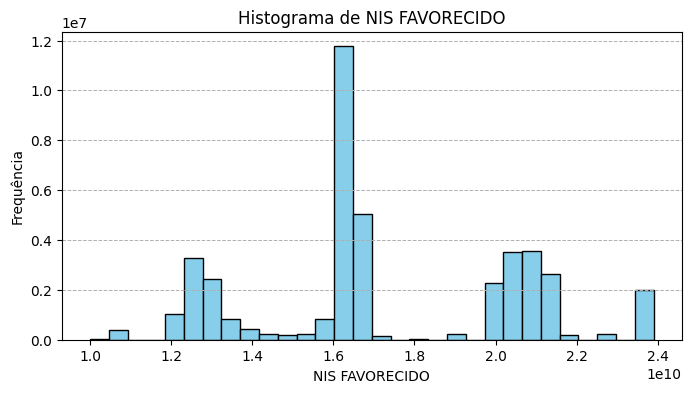

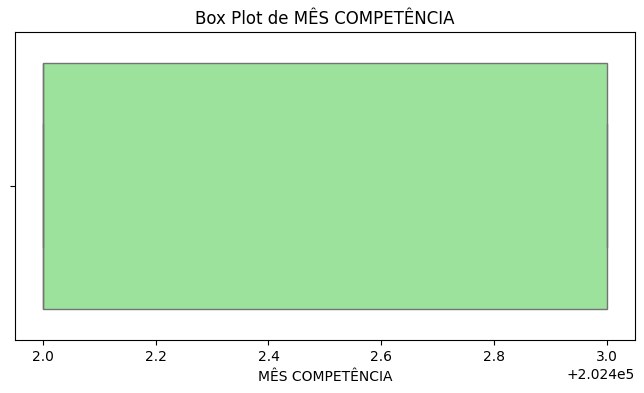

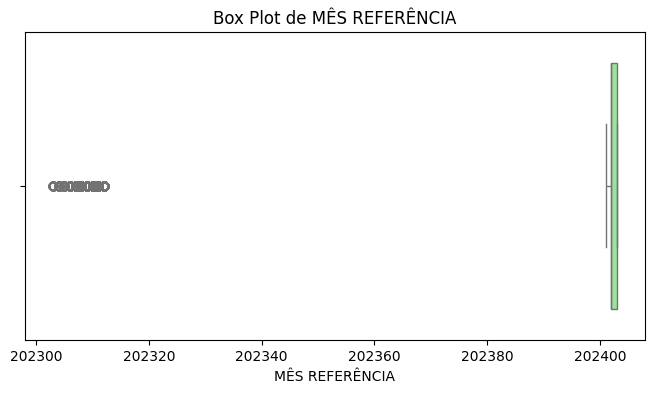

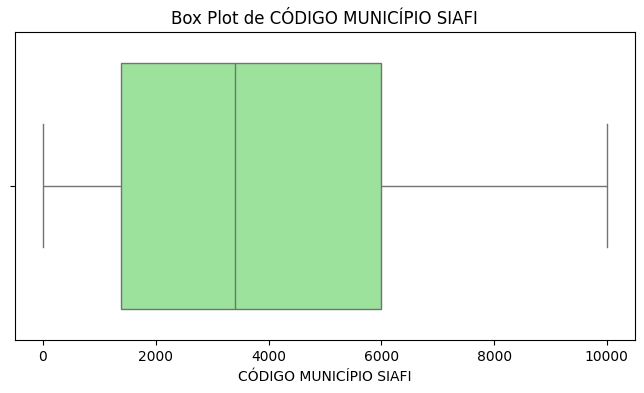

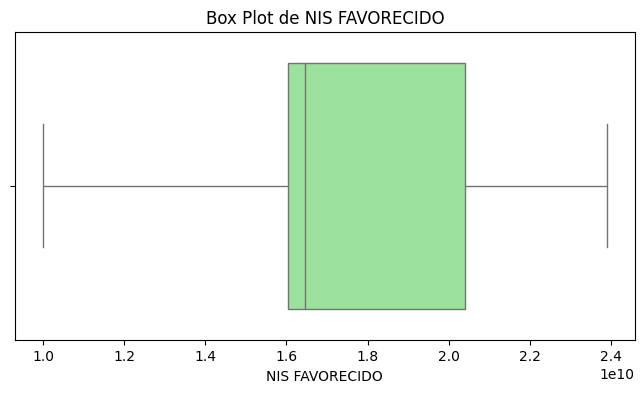


Distribuição de UF:
UF
SP    5058292
BA    4920984
RJ    3391960
MG    3179043
PE    3177070
CE    2930932
PA    2673236
MA    2419345
PB    1339297
AM    1275960
RS    1228218
PR    1208032
PI    1202896
AL    1075363
GO    1018287
RN    1004968
SE     762504
ES     605854
MT     513529
SC     452146
MS     414581
DF     375720
TO     314455
AC     258848
RO     245199
AP     231839
RR     145915
Name: count, dtype: int64


<ipython-input-17-8bcc6ee1720a>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_pandas, order=df_pandas[column].value_counts().index, palette='viridis')


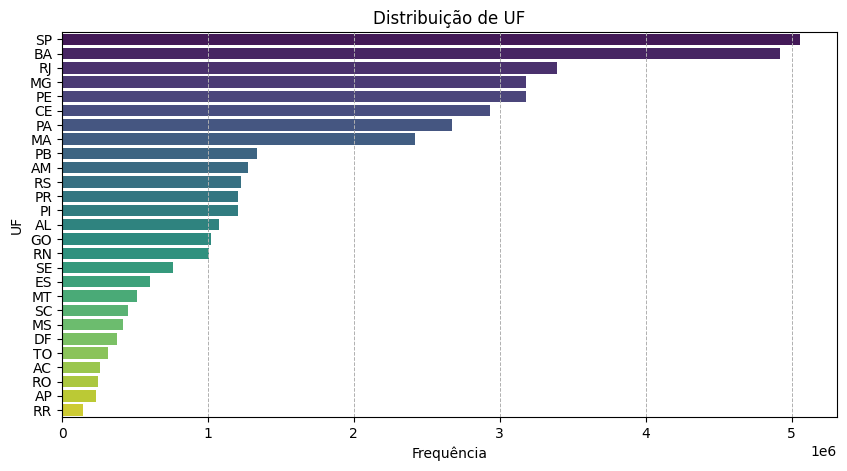


Distribuição de NOME MUNICÍPIO:
NOME MUNICÍPIO
SAO PAULO            1378018
RIO DE JANEIRO       1128266
FORTALEZA             680691
SALVADOR              590725
MANAUS                530880
                      ...   
CUNHATAI                  20
SANTA TEREZA              18
VESPASIANO CORREA         16
MONTAURI                  15
POCO DAS ANTAS            14
Name: count, Length: 5291, dtype: int64


<ipython-input-17-8bcc6ee1720a>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_pandas, order=df_pandas[column].value_counts().index, palette='viridis')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que df_pandas seja o DataFrame

# Estatísticas descritivas para colunas numéricas
print("Estatísticas Descritivas para Colunas Numéricas:")
print(df_pandas.describe())

# Histogramas para colunas numéricas
for column in df_pandas.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df_pandas[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.show()

# Box plots para colunas numéricas
for column in df_pandas.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_pandas, x=column, color='lightgreen')
    plt.title(f'Box Plot de {column}')
    plt.xlabel(column)
    plt.show()

# Distribuição de valores para colunas categóricas
for column in df_pandas.select_dtypes(include=['object']).columns:
    print(f"\nDistribuição de {column}:")
    print(df_pandas[column].value_counts())

    # Gráficos de barras para colunas categóricas
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=df_pandas, order=df_pandas[column].value_counts().index, palette='viridis')
    plt.title(f'Distribuição de {column}')
    plt.xlabel('Frequência')
    plt.ylabel(column)
    plt.grid(axis='x', linestyle='--', linewidth=0.7)
    plt.show()

Relatório de Análise:

Após a análise exploratória dos dados do programa Novo Bolsa Família, observamos algumas tendências e padrões significativos.

Primeiramente, a distribuição dos valores das parcelas apresenta uma leve assimetria à direita, indicando a presença de algumas parcelas excepcionalmente altas que podem influenciar a média. A análise categórica revelou que determinados estados, como São Paulo e Bahia, são responsáveis pela maior parte dos registros, o que pode refletir a densidade populacional ou políticas locais de assistência social.

Além disso, identificamos que a maioria das variáveis categóricas possui uma distribuição bastante desigual, com algumas categorias dominando claramente. Este insight pode ser crucial para direcionar políticas sociais mais equilibradas. A presença de outliers em algumas variáveis numéricas sugere uma necessidade de investigação mais aprofundada para entender sua origem e impacto. Finalmente, a ausência de muitos valores nulos após o tratamento inicial sugere que os dados estão relativamente completos, permitindo análises mais confiáveis e robustas.